<a href="https://colab.research.google.com/github/cvaranasi1/NeuralNetworks_in_TensorFlow/blob/master/Week3_Course3_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import random
import csv
import json
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers


In [3]:
embedding_dim = 100
max_length = 16
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size=160000
test_portion=.1

corpus = []

In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/training_cleaned.csv \
    -O /tmp/training_cleaned.csv

num_sentences = 0


--2020-09-25 01:56:45--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/training_cleaned.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 238942690 (228M) [application/octet-stream]
Saving to: ‘/tmp/training_cleaned.csv’

/tmp/training_clean 100%[===================>] 227.87M  72.2MB/s    in 3.2s    

2020-09-25 01:56:49 (72.2 MB/s) - ‘/tmp/training_cleaned.csv’ saved [238942690/238942690]



In [5]:
corpus = []
with open('/tmp/training_cleaned.csv','r') as f:
  reader = csv.reader(f, delimiter=',')
  numItems = 0
  for row in reader:
    list_item = []
    list_item.append(row[5])
    if row[0] == '0':
      list_item.append(0)
    else:
      list_item.append(1)
    numItems += 1
    corpus.append(list_item)
    

In [6]:
print(len(corpus))
print(type(corpus))

1600000
<class 'list'>


In [7]:
sentences = []
labels = []
random.shuffle(corpus)
print(len(corpus))
for x in range(training_size):
  sentences.append(corpus[x][0])
  labels.append(corpus[x][1])
ts = Tokenizer()
ts.fit_on_texts(sentences)
wis = ts.word_index
sen = ts.texts_to_sequences(sentences)


1600000


In [8]:
padded = pad_sequences(sen,maxlen=max_length,padding=padding_type,truncating=trunc_type)
tp = int(test_portion*160000)
testing_x   = padded[:tp]
training_x  = padded[tp:]
testing_y   = np.array(labels[:tp])
training_y  = np.array(labels[tp:])
print(len(testing_x))
print(len(training_x))
print(len(testing_y))
print(len(training_y))

16000
144000
16000
144000


In [9]:
print(len(wis))

138618


In [10]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O /tmp/glove.6B.100d.txt
  
word_embeddings = {}
embeddings_matrix = np.zeros((len(wis)+1,embedding_dim))
with open('/tmp/glove.6B.100d.txt','r') as f:
  for line in f:
    stuff = line.split()
    word = stuff[0]
    word_embeddings[word] = np.asarray(stuff[1:],dtype='float32')
for k,v in wis.items():
    if word_embeddings.get(k) is not None:
      print((k,v))
      embeddings_matrix[v] = word_embeddings[k]


Streaming output truncated to the last 5000 lines.
('souchong', 110935)
('flagrantly', 110943)
('panasonic', 110951)
('gnarls', 110953)
('hawtrey', 110954)
('syke', 110957)
('nevada', 110960)
('genting', 110976)
('metaverse', 110983)
('necromancer', 110986)
('championing', 110989)
('moondust', 110991)
('glistens', 110992)
('dropbox', 111001)
('adapted', 111005)
('suzaku', 111006)
('grippe', 111010)
('igas', 111015)
('xing', 111019)
('guang', 111020)
('pave', 111027)
('webpages', 111030)
('thrower', 111031)
('scuppered', 111039)
('embodied', 111046)
('beaters', 111060)
('quidditch', 111061)
('amr', 111077)
('achievable', 111085)
('johhny', 111090)
('defaulted', 111095)
('rendezvous', 111096)
('istat', 111107)
('428', 111108)
('roed', 111117)
('vitality', 111118)
('grate', 111125)
('splinters', 111126)
('crooning', 111128)
('tvm', 111141)
('assuredly', 111143)
('nightline', 111151)
('kurus', 111153)
('messager', 111156)
('zips', 111163)
('pare', 111166)
('molo', 111172)
('hemat', 111173)

In [11]:
len(word_embeddings)
print(type(training_x))
print(type(training_y))
print(type(testing_x))
print(type(testing_y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [12]:
embeddings_matrix[1][:]


array([-0.046539  ,  0.61966002,  0.56647003, -0.46584001, -1.18900001,
        0.44599   ,  0.066035  ,  0.31909999,  0.14679   , -0.22119001,
        0.79238999,  0.29905   ,  0.16073   ,  0.025324  ,  0.18678001,
       -0.31000999, -0.28108001,  0.60514998, -1.0654    ,  0.52476001,
        0.064152  ,  1.03579998, -0.40779001, -0.38011   ,  0.30801001,
        0.59964001, -0.26991001, -0.76034999,  0.94221997, -0.46919   ,
       -0.18278   ,  0.90652001,  0.79671001,  0.24824999,  0.25713   ,
        0.6232    , -0.44768   ,  0.65357   ,  0.76902002, -0.51229   ,
       -0.44332999, -0.21867   ,  0.38370001, -1.14830005, -0.94397998,
       -0.15062   ,  0.30012   , -0.57805997,  0.20175   , -1.65910006,
       -0.079195  ,  0.026423  ,  0.22051001,  0.99713999, -0.57538998,
       -2.72659993,  0.31448001,  0.70521998,  1.43809998,  0.99125999,
        0.13976   ,  1.34739995, -1.1753    ,  0.0039503 ,  1.02980006,
        0.064637  ,  0.90886998,  0.82871997, -0.47003001, -0.10

In [13]:
x={'name':'Chandra','age':58}
for k,v in x.items():
  print((k,v))
  print(x.get(k))
  print(x[k])


('name', 'Chandra')
Chandra
Chandra
('age', 58)
58
58


In [22]:
model = Sequential()
model.add(keras.layers.Embedding(len(wis)+1,100,input_length=max_length, weights=[embeddings_matrix],trainable=False))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv1D(64, 5, activation='relu'))
model.add(keras.layers.MaxPooling1D(pool_size=4))
model.add(keras.layers.LSTM(64))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 16, 100)           13861900  
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 100)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 12, 64)            32064     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 3, 64)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 13,927,053
Trainable params: 65,153
Non-trainable params: 13,861,900
_____________________________________

In [23]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(training_x,training_y,epochs=50, validation_data=(testing_x,testing_y))

Epoch 1/50
4500/4500 [==============================] - 21s 5ms/step - loss: 0.5688 - accuracy: 0.6968 - val_loss: 0.5347 - val_accuracy: 0.7276
Epoch 2/50
4500/4500 [==============================] - 21s 5ms/step - loss: 0.5268 - accuracy: 0.7321 - val_loss: 0.5099 - val_accuracy: 0.7409
Epoch 3/50
4500/4500 [==============================] - 21s 5ms/step - loss: 0.5101 - accuracy: 0.7455 - val_loss: 0.5096 - val_accuracy: 0.7468
Epoch 4/50
4500/4500 [==============================] - 21s 5ms/step - loss: 0.4995 - accuracy: 0.7523 - val_loss: 0.5029 - val_accuracy: 0.7492
Epoch 5/50
4500/4500 [==============================] - 21s 5ms/step - loss: 0.4918 - accuracy: 0.7574 - val_loss: 0.4989 - val_accuracy: 0.7496
Epoch 6/50
4500/4500 [==============================] - 21s 5ms/step - loss: 0.4842 - accuracy: 0.7628 - val_loss: 0.4948 - val_accuracy: 0.7563
Epoch 7/50
4500/4500 [==============================] - 20s 5ms/step - loss: 0.4780 - accuracy: 0.7655 - val_loss: 0.4980 - val_ac

<Figure size 432x288 with 0 Axes>

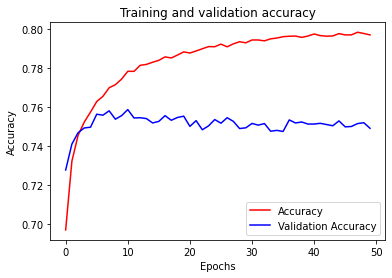

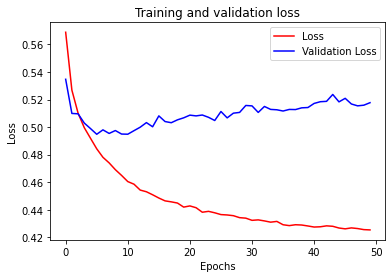

<Figure size 432x288 with 0 Axes>

In [24]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()
